# Projeto 2

In [ ]:
# instalando depencias
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scipy

In [72]:
# importando dependencias
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import math

## DCT

In [157]:
# DCT
def DCT1D(data):
    N = len(data)
    X = np.zeros(N)
    ak = math.sqrt(2.0/N)
    
    for k in range(N):
        ck = math.sqrt(1.0/2.0) if k == 0 else 1        
        s = 0
        
        for n in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            
            s += data[n] * math.cos((q/two_n) + (w/two_n))
        
        X[k] = ak * ck * s
    
    return X

## IDCT

In [158]:
def IDCT1D(data):
    N = len(data)
    x = np.zeros(N)
    
    ak = math.sqrt(2.0/N)
    
    for n in range(N):
        s = 0
        for k in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            ck = math.sqrt(1.0/2.0) if k == 0 else 1
                
            s += ck * data[k] * math.cos((q/two_n) + (w/two_n))
            
        x[n] = ak * s
    
    return x
    

### Testes DCT e IDCT

In [189]:
x = np.array([5.9285,2.1515,0.4693,-0.5441,0.9595,3.6881,4.0156])

X_DCT = DCT1D(x)
X_IDCT = IDCT1D(X_DCT)

In [190]:
x

array([ 5.9285,  2.1515,  0.4693, -0.5441,  0.9595,  3.6881,  4.0156])

In [191]:
X_IDCT

array([ 5.9285,  2.1515,  0.4693, -0.5441,  0.9595,  3.6881,  4.0156])

# Audio

In [272]:
# Read Wav File
filename = "mais.wav"
portion_slice = 2000
base = 20000
audio_rate, audio_data = wavfile.read("./" + filename)
# audio_portion = audio_data[base:base+portion_slice]
audio_portion = audio_data
audio_data.shape

(7516,)

In [273]:
# draw audio wave graph
def plot_audio_wave(data, figsize=[20,6], color="blue", y_label="Amplitude", stroke=0.5, title=""):
    plt.figure('Data', figsize=figsize)
    plt.plot(data, linewidth=stroke,alpha=1,color=color)
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

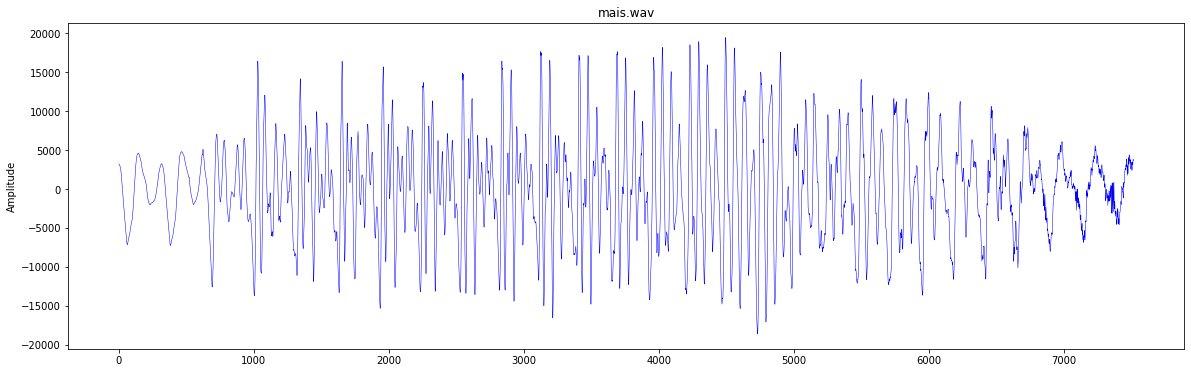

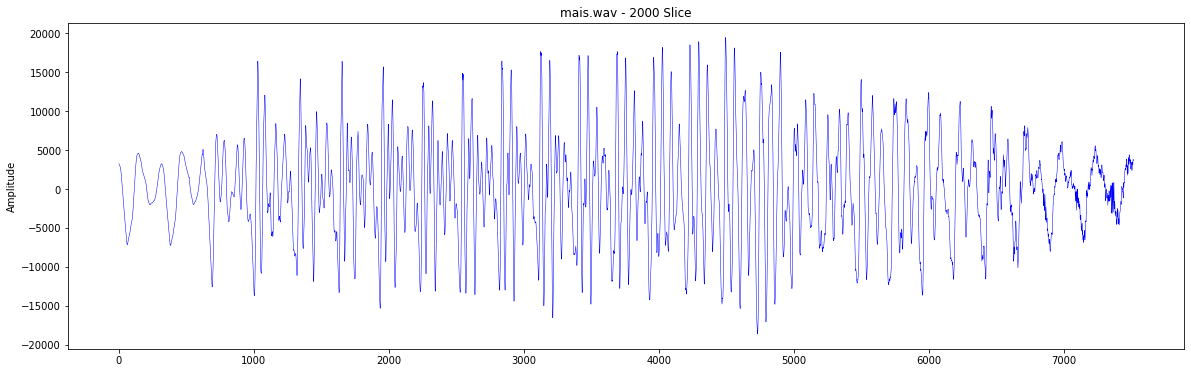

In [274]:
plot_audio_wave(audio_data, title=filename)
plot_audio_wave(audio_portion, title="{} - {} Slice".format(filename, portion_slice))

In [268]:
wavfile.write("audioTransformado.wav", audio_rate, audio_portion)

## DCT AUDIO

In [258]:
print("Inicio DCT")
DCT = DCT1D(audio_portion)
print("Fim DCT")

Inicio DCT
Fim DCT


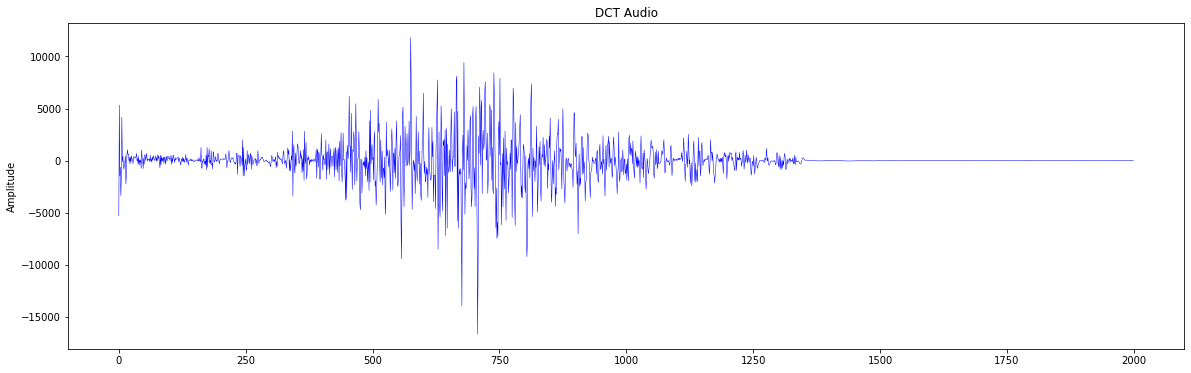

Nivel DC: -5291.520704674603


In [259]:
plot_audio_wave(DCT, title="DCT Audio")
print("Nivel DC: {}".format(DCT[0]))

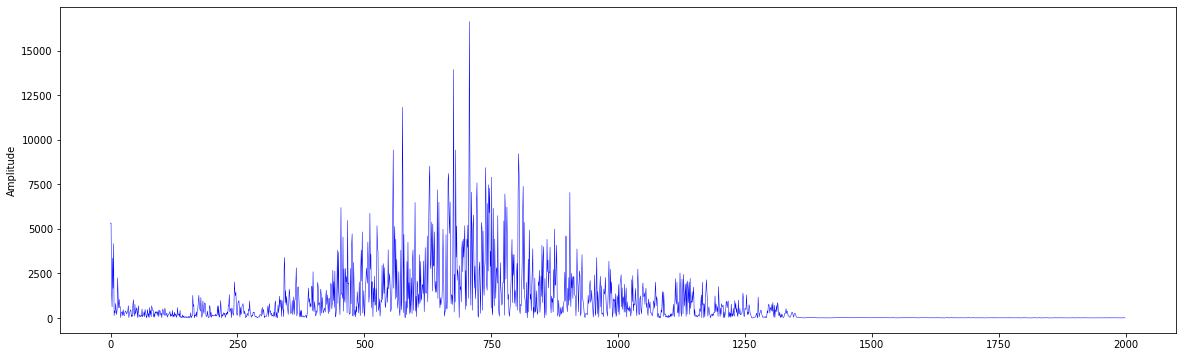

In [260]:
from scipy import fftpack
DCT_filtered = DCT.copy()
# dct_pack = fftpack.dct(audio_portion, norm='ortho')

# Valores modulados
for i in range(len(DCT)):
    DCT_filtered[i] = abs(DCT[i])
# plot_audio_wave(DCT)
DCT_abs = DCT_filtered.copy()
plot_audio_wave(DCT_filtered)

In [261]:
num = int(input("Numero de freq? "))

Numero de freq?  100


In [263]:
aux = DCT_filtered.copy()[1:]
aux_sorted = list(enumerate(aux))

def sortKey(e):
    return e[1]
aux_sorted.sort(key=sortKey)
aux_sorted = aux_sorted[::-1]

freq_selecionadas = [aux_sorted[i][0] for i in range(num)]
# freq_selecionadas

In [264]:
for i in range(len(DCT_filtered)):
    if i not in freq_selecionadas:
        DCT_filtered[i] = 0

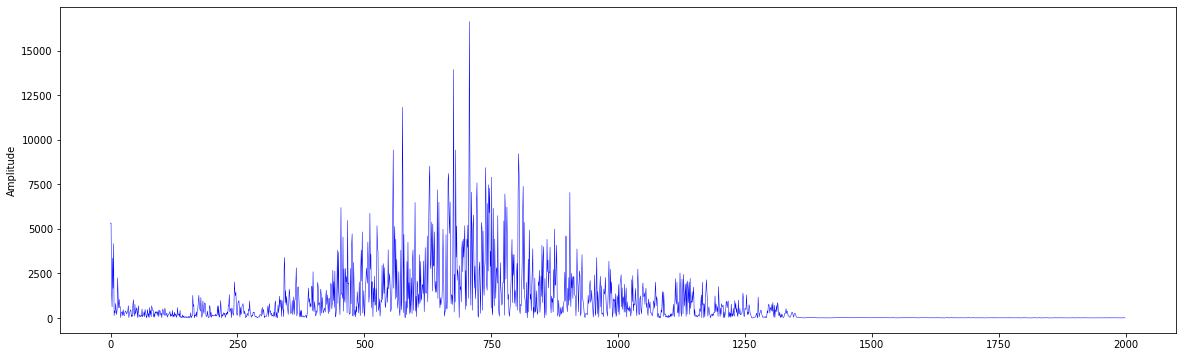

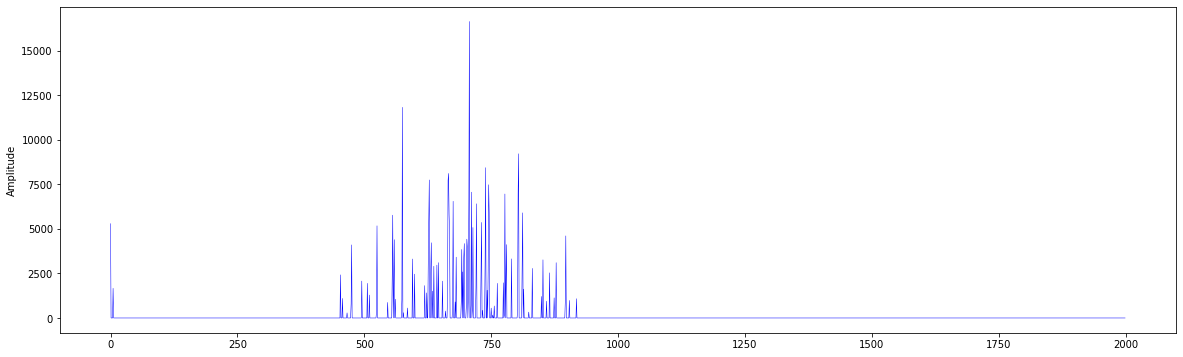

In [265]:
plot_audio_wave(DCT_abs)
plot_audio_wave(DCT_filtered)

In [ ]:
# salvando no arquivo
IDCT = IDCT1D(DCT_filtered)
